In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def linear_regression_numpy(X, y, learning_rate=0.01, iterations=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(iterations):
        y_predicted = np.dot(X, weights) + bias
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias



In [38]:
def preprocess_data(df):
    # Convert categorical variables to numerical using one-hot encoding
    df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

    # Separate features and target variable
    X = df.drop('charges', axis=1).values
    y = df['charges'].values

    # Convert X to float64 BEFORE feature scaling
    X = X.astype(np.float64)

    # Feature Scaling (Standardization)
    for i in range(X.shape[1]):  # Iterate through columns
        X[:, i] = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])

    return X, y

In [39]:
def evaluate_model(y_true, y_predicted):
    mse = np.mean((y_true - y_predicted) ** 2)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y_true - y_predicted) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    return mse, rmse, r2

In [40]:
df = pd.read_csv('data_insurance.csv')


In [41]:
print(df.head()) #data set

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [42]:
X, y = preprocess_data(df)

In [43]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [44]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

In [45]:
y_predicted = model.predict(X_test)

# Evaluate the model
mse, rmse, r2 = evaluate_model(y_test, y_predicted)

In [46]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 37164301.71146567
Root Mean Squared Error (RMSE): 6096.253087878297
R-squared (R²): 0.7585604010433598


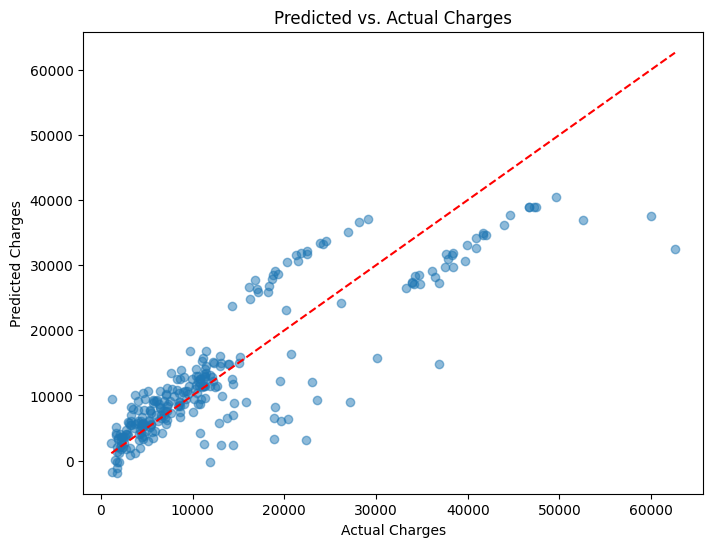

In [47]:
# 1. Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predicted, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs. Actual Charges")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.show()

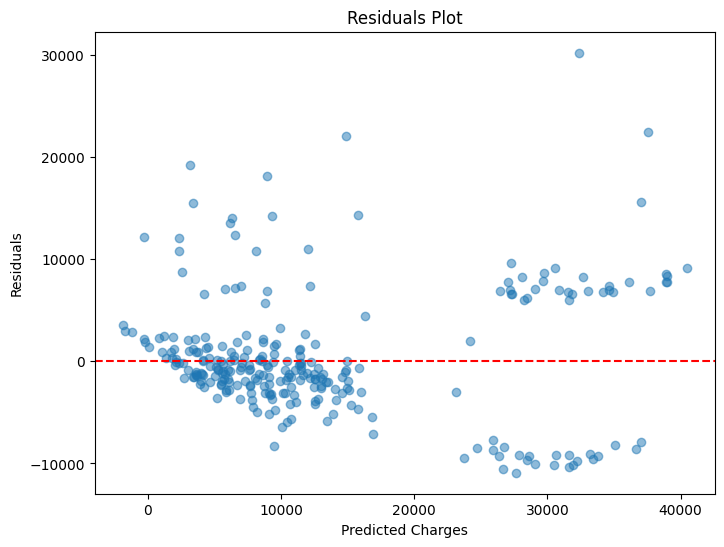

In [48]:
# 2. Residuals Plot
residuals = y_test - y_predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_predicted, residuals, alpha=0.5)
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.axhline(y=0, color='red', linestyle='--')  
plt.show()